In [373]:
import numpy as np
import pandas as pd
test_data = pd.read_csv('dataset/adult.test',skiprows=1) #the first line in the dataset is empty space, so I skip it 
train_data = pd.read_csv('dataset/adult.data',)
index_data = pd.read_csv('dataset/Index')

In [374]:
train_data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [375]:
test_data

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [376]:
column_headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
train_data.columns = column_headers
test_data.columns = column_headers

In [377]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [378]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [379]:
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True) #ignore index true resets the index
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education-num   48840 non-null  int64 
 5   marital-status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital-gain    48840 non-null  int64 
 11  capital-loss    48840 non-null  int64 
 12  hours-per-week  48840 non-null  int64 
 13  native-country  48840 non-null  object
 14  income          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [380]:
#standardising the text based data in each column
combined_data['workclass'] = combined_data['workclass'].str.lower().str.strip() 
combined_data['education'] = combined_data['education'].str.lower().str.strip()
combined_data['marital-status'] = combined_data['marital-status'].str.lower().str.strip()
combined_data['occupation'] = combined_data['occupation'].str.lower().str.strip()
combined_data['relationship'] = combined_data['relationship'].str.lower().str.strip()
combined_data['race'] = combined_data['race'].str.lower().str.strip()
combined_data['sex'] = combined_data['sex'].str.lower().str.strip()
combined_data['native-country'] = combined_data['native-country'].str.lower().str.strip()
combined_data['income'] = combined_data['income'].str.lower().str.strip()
combined_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
1,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
2,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
3,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,284582,masters,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,39,private,215419,bachelors,13,divorced,prof-specialty,not-in-family,white,female,0,0,36,united-states,<=50k.
48836,64,?,321403,hs-grad,9,widowed,?,other-relative,black,male,0,0,40,united-states,<=50k.
48837,38,private,374983,bachelors,13,married-civ-spouse,prof-specialty,husband,white,male,0,0,50,united-states,<=50k.
48838,44,private,83891,bachelors,13,divorced,adm-clerical,own-child,asian-pac-islander,male,5455,0,40,united-states,<=50k.


In [381]:
combined_data.drop_duplicates()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education-num   48840 non-null  int64 
 5   marital-status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital-gain    48840 non-null  int64 
 11  capital-loss    48840 non-null  int64 
 12  hours-per-week  48840 non-null  int64 
 13  native-country  48840 non-null  object
 14  income          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [382]:
combined_data['income'].value_counts()

income
<=50k     24719
<=50k.    12434
>50k       7841
>50k.      3846
Name: count, dtype: int64

In [383]:
#The income column has datapoints with '.'
combined_data['income'] = combined_data['income'].replace('<=50k.','<=50k')
combined_data['income'] = combined_data['income'].replace('>50k.','>50k')
combined_data['income'].value_counts()

income
<=50k    37153
>50k     11687
Name: count, dtype: int64

In [384]:
combined_data['workclass'].unique()

array(['self-emp-not-inc', 'private', 'state-gov', 'federal-gov',
       'local-gov', '?', 'self-emp-inc', 'without-pay', 'never-worked'],
      dtype=object)

In [385]:
combined_data['race'].value_counts()

race
white                 41761
black                  4684
asian-pac-islander     1519
amer-indian-eskimo      470
other                   406
Name: count, dtype: int64

In [386]:
combined_data['sex'].value_counts()

sex
male      32648
female    16192
Name: count, dtype: int64

In [387]:
combined_data['occupation'].value_counts()

occupation
prof-specialty       6172
craft-repair         6112
exec-managerial      6086
adm-clerical         5610
sales                5504
other-service        4923
machine-op-inspct    3021
?                    2809
transport-moving     2355
handlers-cleaners    2072
farming-fishing      1490
tech-support         1446
protective-serv       983
priv-house-serv       242
armed-forces           15
Name: count, dtype: int64

In [390]:
combined_data['marital-status'].value_counts()

marital-status
married-civ-spouse       22379
never-married            16115
divorced                  6633
separated                 1530
widowed                   1518
married-spouse-absent      628
married-af-spouse           37
Name: count, dtype: int64

In [391]:
combined_data['native-country'].value_counts()

native-country
united-states                 43830
mexico                          951
?                               857
philippines                     295
germany                         206
puerto-rico                     184
canada                          182
el-salvador                     155
india                           151
cuba                            138
england                         127
china                           122
south                           115
jamaica                         106
italy                           105
dominican-republic              103
japan                            92
guatemala                        88
poland                           87
vietnam                          86
columbia                         85
haiti                            75
portugal                         67
taiwan                           65
iran                             59
greece                           49
nicaragua                        49
peru         

In [392]:
for i in combined_data.columns:
    print(combined_data[i].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
['self-emp-not-inc' 'private' 'state-gov' 'federal-gov' 'local-gov' '?'
 'self-emp-inc' 'without-pay' 'never-worked']
[ 83311 215646 234721 ... 173449  89686 350977]
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['married-civ-spouse' 'divorced' 'married-spouse-absent' 'never-married'
 'separated' 'married-af-spouse' 'widowed']
['exec-managerial' 'handlers-cleaners' 'prof-specialty' 'other-service'
 'adm-clerical' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' '?'
 'protective-serv' 'armed-forces' 'priv-house-serv']
['husband' 'not-in-family' '

In [393]:
for i in combined_data.columns:
    count = (combined_data[i]=='?').sum()
    if count > 0:
        print(f"{i} has {count} missing values")

workclass has 2799 missing values
occupation has 2809 missing values
native-country has 857 missing values


In [394]:
import numpy as np

combined_data.replace('?',np.NaN, inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       46041 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education-num   48840 non-null  int64 
 5   marital-status  48840 non-null  object
 6   occupation      46031 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital-gain    48840 non-null  int64 
 11  capital-loss    48840 non-null  int64 
 12  hours-per-week  48840 non-null  int64 
 13  native-country  47983 non-null  object
 14  income          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [395]:
((combined_data['workclass'].isna()) & (combined_data['occupation'].isna())).sum()

2799

In [396]:
((combined_data['workclass'].notna()) & (combined_data['occupation'].isna())).sum()

10

In [397]:
combined_data = combined_data.drop(combined_data[(combined_data['workclass'].notna()) & (combined_data['occupation'].isna())].index)
combined_data.reset_index(drop=True)
combined_data.info()

#I could do conditional imputation and predict the missing occupation based on workclass but it is only 10 rows of data which is about 0.02% of the data. The rest where occupation and workclass is NaN , it is good to leave them in a category called unknown as that could have some pattern. e.g May be  people with unknown jobs are likely to get less than 50k.

<class 'pandas.core.frame.DataFrame'>
Index: 48830 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48830 non-null  int64 
 1   workclass       46031 non-null  object
 2   fnlwgt          48830 non-null  int64 
 3   education       48830 non-null  object
 4   education-num   48830 non-null  int64 
 5   marital-status  48830 non-null  object
 6   occupation      46031 non-null  object
 7   relationship    48830 non-null  object
 8   race            48830 non-null  object
 9   sex             48830 non-null  object
 10  capital-gain    48830 non-null  int64 
 11  capital-loss    48830 non-null  int64 
 12  hours-per-week  48830 non-null  int64 
 13  native-country  47973 non-null  object
 14  income          48830 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [398]:
#all the rows where workclass and occupation are null gets replaced with unknown, the info confirms that they both go missin at the same time and they are related. 
combined_data.loc[(combined_data['workclass'].isna()) & (combined_data['occupation'].isna()), ['workclass', 'occupation']] = 'unknown'
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48830 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48830 non-null  int64 
 1   workclass       48830 non-null  object
 2   fnlwgt          48830 non-null  int64 
 3   education       48830 non-null  object
 4   education-num   48830 non-null  int64 
 5   marital-status  48830 non-null  object
 6   occupation      48830 non-null  object
 7   relationship    48830 non-null  object
 8   race            48830 non-null  object
 9   sex             48830 non-null  object
 10  capital-gain    48830 non-null  int64 
 11  capital-loss    48830 non-null  int64 
 12  hours-per-week  48830 non-null  int64 
 13  native-country  47973 non-null  object
 14  income          48830 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [399]:
(combined_data['workclass']=='unknown').sum()

2799

In [400]:
(combined_data['occupation']=='unknown').sum()

2799

In [401]:
combined_data['native-country'].unique()

array(['united-states', 'cuba', 'jamaica', 'india', nan, 'mexico',
       'south', 'puerto-rico', 'honduras', 'england', 'canada', 'germany',
       'iran', 'philippines', 'italy', 'poland', 'columbia', 'cambodia',
       'thailand', 'ecuador', 'laos', 'taiwan', 'haiti', 'portugal',
       'dominican-republic', 'el-salvador', 'france', 'guatemala',
       'china', 'japan', 'yugoslavia', 'peru',
       'outlying-us(guam-usvi-etc)', 'scotland', 'trinadad&tobago',
       'greece', 'nicaragua', 'vietnam', 'hong', 'ireland', 'hungary',
       'holand-netherlands'], dtype=object)

In [402]:
grouped_data = combined_data.groupby(['race', 'age'])

# Iterate over groups and impute missing values in 'native-country' column
for group_name, group_data in grouped_data:
    # Calculate mode of 'native-country' within the group
    mode_native_country = group_data['native-country'].mode().iloc[0]
    # Fill missing values with mode of the group
    combined_data.loc[group_data.index, 'native-country'] = combined_data.loc[group_data.index, 'native-country'].fillna(mode_native_country)

In [403]:
combined_data['native-country'].unique()

array(['united-states', 'cuba', 'jamaica', 'india', 'china', 'mexico',
       'south', 'puerto-rico', 'honduras', 'england', 'canada', 'germany',
       'iran', 'philippines', 'italy', 'poland', 'columbia', 'cambodia',
       'thailand', 'ecuador', 'laos', 'taiwan', 'haiti', 'portugal',
       'dominican-republic', 'el-salvador', 'france', 'guatemala',
       'japan', 'yugoslavia', 'peru', 'outlying-us(guam-usvi-etc)',
       'scotland', 'trinadad&tobago', 'greece', 'nicaragua', 'vietnam',
       'hong', 'ireland', 'hungary', 'holand-netherlands'], dtype=object)

In [404]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48830 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48830 non-null  int64 
 1   workclass       48830 non-null  object
 2   fnlwgt          48830 non-null  int64 
 3   education       48830 non-null  object
 4   education-num   48830 non-null  int64 
 5   marital-status  48830 non-null  object
 6   occupation      48830 non-null  object
 7   relationship    48830 non-null  object
 8   race            48830 non-null  object
 9   sex             48830 non-null  object
 10  capital-gain    48830 non-null  int64 
 11  capital-loss    48830 non-null  int64 
 12  hours-per-week  48830 non-null  int64 
 13  native-country  48830 non-null  object
 14  income          48830 non-null  object
dtypes: int64(6), object(9)
memory usage: 7.0+ MB


In [405]:
combined_data.drop(columns=['education','fnlwgt'],axis=1, inplace=True) #education number is enough and fnlwgt but why?
combined_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,self-emp-not-inc,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
1,38,private,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
2,53,private,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
3,28,private,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,<=50k


In [406]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_data['income'] = le.fit_transform(combined_data['income'])
combined_data['native-country'] = le.fit_transform(combined_data['native-country'])
combined_data['sex'] = le.fit_transform(combined_data['sex'])
combined_data['race'] = le.fit_transform(combined_data['race'])
combined_data['relationship'] = le.fit_transform(combined_data['relationship'])
combined_data['occupation'] = le.fit_transform(combined_data['occupation'])
combined_data['marital-status'] = le.fit_transform(combined_data['marital-status'])
combined_data['workclass'] = le.fit_transform(combined_data['workclass'])
combined_data.sample(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
576,36,4,12,0,11,4,4,0,0,0,35,38,0
43109,47,2,6,0,12,4,2,0,0,0,38,38,0
4673,62,4,10,2,3,0,4,1,0,0,10,38,0
328,66,2,9,4,13,1,4,1,2050,0,55,38,0
46517,90,2,10,4,7,3,4,1,0,0,10,38,0


<Axes: >

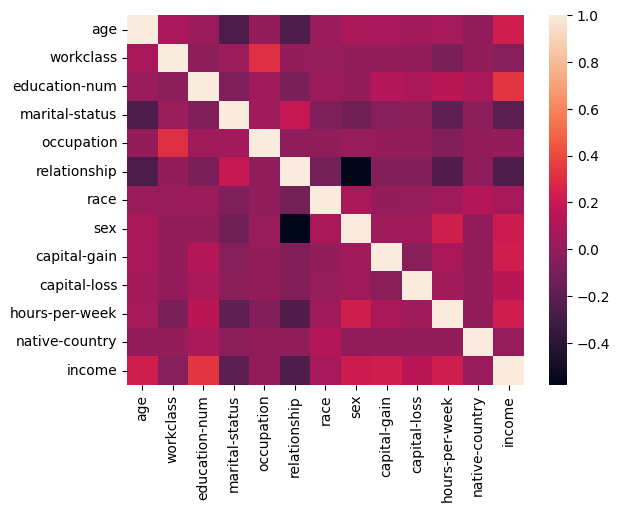

In [408]:
#but is there a way to find which ones really influence the prediction the most? wht abt heatmap?
import seaborn as sns
sns.heatmap(combined_data.corr())
#the darker colour means higher correlation, therefore there is strong correletion between education-num and income 

In [409]:
x = combined_data.drop(columns=['income'], axis=1)
y = combined_data['income']

In [410]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #Splitting the dataset into training and testing set